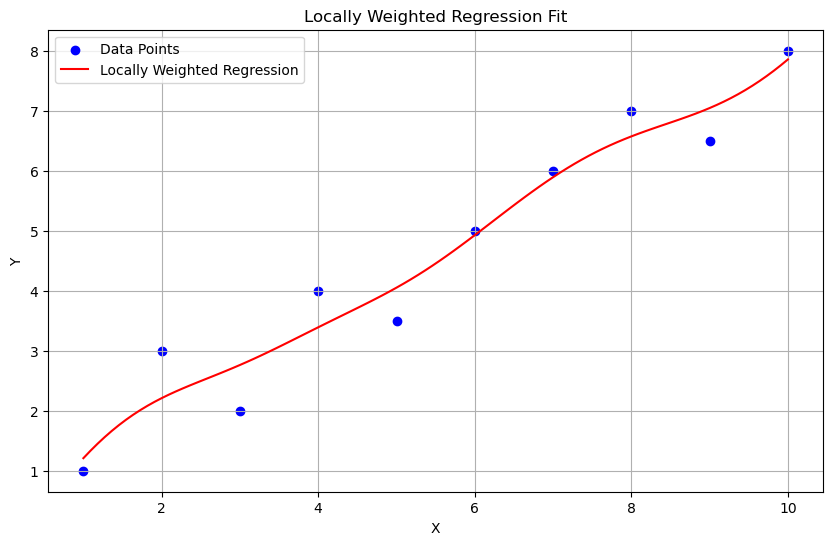

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(X, y, x_query, tau):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]           
    x_query_b = np.array([1, x_query])        

    W = np.exp(-np.square(X - x_query) / (2 * tau ** 2))
    W = np.diag(W)
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    return x_query_b @ theta

X = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1,3,2,4,3.5,5,6,7,6.5,8])

X_query = np.linspace(1, 10, 100)
tau = 1.0

y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lwr, color='red', label='Locally Weighted Regression')
plt.title("Locally Weighted Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()